In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import scipy.stats

In [25]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## 확률론적 생성모형(generative model)
### 선형판별분석법(linear discriminant analysis, LDA)
### 이차판별분석법(quadratic discriminant analysis, QDA)

In [ ]:
N = 100
rv1 = sp.stats.multivariate_normal([ 0, 0], [[0.7, 0.0], [0.0, 0.7]])
rv2 = sp.stats.multivariate_normal([ 1, 1], [[0.8, 0.2], [0.2, 0.8]])
rv3 = sp.stats.multivariate_normal([-1, 1], [[0.8, 0.2], [0.2, 0.8]])
np.random.seed(0)
X1 = rv1.rvs(N)
X2 = rv2.rvs(N)
X3 = rv3.rvs(N)
y1 = np.zeros(N)
y2 = np.ones(N)
y3 = 2 * np.ones(N)
X = np.vstack([X1, X2, X3])
y = np.hstack([y1, y2, y3])

plt.scatter(X1[:, 0], X1[:, 1], alpha=0.8, s=50, marker="o", color='r', label="class 1")
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.8, s=50, marker="s", color='g', label="class 2")
plt.scatter(X3[:, 0], X3[:, 1], alpha=0.8, s=50, marker="x", color='b', label="class 3")
plt.xlim(-5, 5)
plt.ylim(-4, 5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.show()

In [7]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis(store_covariance=True).fit(X, y)

In [8]:
qda.priors_ # priors_: 각 클래스 k의 사전확률 # means_ covariance_

array([0.33333333, 0.33333333, 0.33333333])

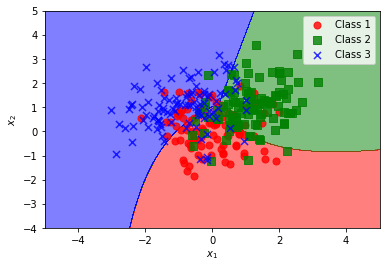

In [20]:
# 이차판별분석법(quadratic discriminant analysis, QDA)
import matplotlib as mpl
x1min, x1max = -5, 5
x2min, x2max = -4, 5
XX1, XX2 = np.meshgrid(np.arange(x1min, x1max, (x1max-x1min)/1000),
                       np.arange(x2min, x2max, (x2max-x2min)/1000))
YY = np.reshape(qda.predict(np.array([XX1.ravel(), XX2.ravel()]).T), XX1.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette(["r", "g", "b"]).as_hex())
plt.contourf(XX1, XX2, YY, cmap=cmap, alpha=0.5)
plt.scatter(X1[:, 0], X1[:, 1], alpha=0.8, s=50, marker="o", color='r', label="Class 1")
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.8, s=50, marker="s", color='g', label="Class 2")
plt.scatter(X3[:, 0], X3[:, 1], alpha=0.8, s=50, marker="x", color='b', label="Class 3")
plt.xlim(x1min, x1max)
plt.ylim(x2min, x2max)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.show()

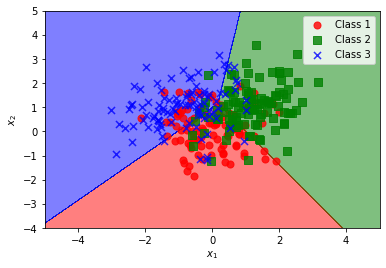

In [19]:
# 선형판별분석법(linear discriminant analysis, LDA)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2, solver="svd", store_covariance=True).fit(X, y)

x1min, x1max = -5, 5
x2min, x2max = -4, 5
XX1, XX2 = np.meshgrid(np.arange(x1min, x1max, (x1max-x1min)/1000),
                       np.arange(x2min, x2max, (x2max-x2min)/1000))
YY = np.reshape(lda.predict(np.array([XX1.ravel(), XX2.ravel()]).T), XX1.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette(["r", "g", "b"]).as_hex())
plt.contourf(XX1, XX2, YY, cmap=cmap, alpha=0.5)
plt.scatter(X1[:, 0], X1[:, 1], alpha=0.8, s=50, marker="o", color='r', label="Class 1")
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.8, s=50, marker="s", color='g', label="Class 2")
plt.scatter(X3[:, 0], X3[:, 1], alpha=0.8, s=50, marker="x", color='b', label="Class 3")
plt.xlim(x1min, x1max)
plt.ylim(x2min, x2max)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.show()

## 이항검정

In [7]:
scipy.stats.binom_test(3, n=15, p=0.1, alternative='greater')

0.18406106910639114

## 카이제곱 검정

In [11]:
scipy.stats.chisquare([1,2])
scipy.stats.chi2_contingency([1,2]) # 독립검정  

(0.0, 1.0, 0, array([1., 2.]))

## 단일표본 t-검정
* ttest_1samp(표본 데이터 배열, 귀무가설 기댓값)

In [14]:
rvs = scipy.stats.norm.rvs(loc=5, scale=10, size=(50,2))
scipy.stats.ttest_1samp(rvs, popmean=0)

Ttest_1sampResult(statistic=array([4.19567036, 3.40670027]), pvalue=array([0.00011389, 0.00132173]))

## 독립표본 t-검정(등분산검정)
* ttest_ind(1표본 집합, 2표본 집합, equal_var= TRUE두 표본 분산 동일)

In [19]:
rvs1 = scipy.stats.norm.rvs(loc=5,scale=10,size=500)
rvs2 = scipy.stats.norm.rvs(loc=5,scale=10,size=500)
scipy.stats.ttest_ind(rvs1,rvs2)

Ttest_indResult(statistic=1.3653619613781396, pvalue=0.17244698309059026)

## 대응표본 t-검정
* ttest_rel(1표본 집합, 2표본 집합)

In [20]:
rvs1 = scipy.stats.norm.rvs(loc=5,scale=10,size=500)
rvs2 = scipy.stats.norm.rvs(loc=5,scale=10,size=500)
scipy.stats.ttest_rel(rvs1,rvs2)

Ttest_relResult(statistic=0.9123887672881138, pvalue=0.3620046794924112)

In [ ]:
`

## 등분산검정
* bartlett, fligner, levene 검정 

In [26]:
x1 = scipy.stats.norm(0, 1).rvs(100)
x2 = scipy.stats.norm(0, 1.2).rvs(200)
scipy.stats.bartlett(x1, x2)
scipy.stats.fligner(x1, x2)
scipy.stats.levene(x1, x2)

BartlettResult(statistic=4.649749177961601, pvalue=0.031058085281715306)

FlignerResult(statistic=2.715123236154355, pvalue=0.09940129370598313)

LeveneResult(statistic=3.056433411669653, pvalue=0.08144779078993931)

## 정규성 검정
* 콜모고로프-스미르노프 검정 ks_2samp  
* 샤피로-월크 shapiro  

In [29]:
scipy.stats.ks_2samp(x1, x2)
scipy.stats.shapiro(x1)  

Ks_2sampResult(statistic=0.075, pvalue=0.8398708501969149)

(0.9836831092834473, 0.25426897406578064)

## 확률론적 생성모형(generative model)
### 이차판별분석법(quadratic discriminant analysis, QDA)

In [6]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis(store_covariance=True).fit(X, y)

### 선형판별분석법(linear discriminant analysis, LDA)

## 희소 행렬

### COO 형식

In [ ]:
from scipy import sparse

In [ ]:
dense = np.array( [ [ 3, 0, 1 ], 
                    [0, 2, 0 ] ] )
dense

In [ ]:
data = np.array([3,1,2])
row_pos = np.array([0,0,1])
col_pos = np.array([0,2,1])

sparse_coo = sparse.coo_matrix((data, (row_pos,col_pos)))

In [ ]:
print(type(sparse_coo))
print(sparse_coo)
dense01=sparse_coo.toarray()
print(type(dense01),"\n", dense01)

### CSR 형식

In [ ]:
dense2 = np.array([[0,0,1,0,0,5],
             [1,4,0,3,2,5],
             [0,6,0,3,0,0],
             [2,0,0,0,0,0],
             [0,0,0,7,0,8],
             [1,0,0,0,0,0]])
dense2

In [ ]:
# 0 이 아닌 데이터 추출
data2 = np.array([1, 5, 1, 4, 3, 2, 5, 6, 3, 2, 7, 8, 1])

# 행 위치와 열 위치를 각각 array로 생성 
row_pos = np.array([0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5])
col_pos = np.array([2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0])

# COO 형식으로 변환 
sparse_coo = sparse.coo_matrix((data2, (row_pos,col_pos)))

# 행 위치 배열의 고유한 값들의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0, 2, 7, 9, 10, 12, 13])

# CSR 형식으로 변환 
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

In [ ]:
print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

In [ ]:
print(sparse_csr)

In [ ]:
dense3 = np.array([[0,0,1,0,0,5],
             [1,4,0,3,2,5],
             [0,6,0,3,0,0],
             [2,0,0,0,0,0],
             [0,0,0,7,0,8],
             [1,0,0,0,0,0]])

coo = sparse.coo_matrix(dense3)
csr = sparse.csr_matrix(dense3)

In [ ]:
print(coo)

In [ ]:
print(csr)